<a href="https://colab.research.google.com/github/cepdnaclk/e18-4yp-Predicting-Forex-Currency-Exchange-Rate-using-Machine-Learning/blob/main/LKRUSD_IN1_LSTM_Bayesian_Version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas_ta
!pip install bayesian-optimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=f88738bb57c8162c75e1ed51cbb0e53bebf60a69d9cd837226e5718ac1187feb
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import pandas as pd
import pandas_ta as ta

data = pd.read_csv('LKR=X (3).csv')
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-09,173.020004,176.050003,172.539993,176.050003,176.050003,0.0
1,2019-07-10,172.490005,176.050003,172.479996,176.050003,176.050003,0.0
2,2019-07-11,171.839996,176.050003,171.839996,176.050003,176.050003,0.0
3,2019-07-12,172.630005,176.050003,172.360001,176.050003,176.050003,0.0
4,2019-07-15,172.160004,175.639999,172.160004,176.050003,176.050003,0.0
...,...,...,...,...,...,...,...
1301,2024-07-03,301.586273,301.628357,301.081665,302.451538,302.451538,0.0
1302,2024-07-04,300.190399,300.962646,300.190399,301.081665,301.081665,0.0
1303,2024-07-05,NaN,NaN,NaN,NaN,NaN,NaN
1304,2024-07-08,301.584656,301.584656,301.255280,301.793793,301.793793,0.0


In [ ]:
data['T-4'] = data['Close']
data['T-3'] = data['Close'].shift(-1)
data['T-2'] = data['Close'].shift(-2)
data['T-1'] = data['Close'].shift(-3)
data['T0'] = data['Close'].shift(-4)

data['SMA_5_H'] = ta.sma(data['High'], length=5).shift(-4)
data['SMA_5_L'] = ta.sma(data['Low'], length=5).shift(-4)
data['EMA_5_C'] = ta.ema(data['Close'], length=5).shift(-4)
data['RSI'] = ta.rsi(data['Close'], length=14).shift(-14)

#Closing value of the next day
data['T_F'] = data['Close'].shift(-5)

In [ ]:
print(data.tail(10))

            Date        Open        High         Low       Close   Adj Close  \
1296  2024-05-20  295.506714  296.635529  295.506714  294.929016  294.929016   
1297  2024-05-21  296.688782  296.796051  296.688782  296.739319  296.739319   
1298  2024-05-22  296.992859  296.992859  296.874847  296.796051  296.796051   
1299  2024-05-23  297.043518  297.043518  296.886108  296.874847  296.874847   
1300  2024-05-24  297.840454  297.840454  296.466858  296.886108  296.886108   
1301  2024-05-27  296.123901  297.297058  296.123901  295.987457  295.987457   
1302  2024-05-28  297.227264  298.504425  297.227264  297.297058  297.297058   
1303  2024-05-29  299.508514  299.508514  298.592590  299.327850  299.327850   
1304  2024-05-30  299.668427  299.668427  298.626251  298.592590  298.592590   
1305  2024-05-31  301.350006  301.640015  301.220001  301.329987  301.329987   

      Volume         T-4         T-3         T-2         T-1          T0  \
1296       0  294.929016  296.739319  296.7

In [ ]:
# Dropping NaN values
data.dropna(inplace=True)

print(data.tail(10))


            Date        Open        High         Low       Close   Adj Close  \
1282  2024-06-06  298.705231  299.649506  298.705231  299.216644  299.216644   
1283  2024-06-07  299.100616  299.451355  299.100616  299.052551  299.052551   
1284  2024-06-10  302.564423  303.249542  299.640289  301.465210  301.465210   
1285  2024-06-11  299.105804  300.489960  299.105804  299.640289  299.640289   
1286  2024-06-12  300.184906  300.184906  298.853668  300.489960  300.489960   
1287  2024-06-13  297.405396  301.337433  297.405396  298.886993  298.886993   
1288  2024-06-14  302.300140  302.300140  300.788269  301.337433  301.337433   
1289  2024-06-17  300.705383  300.705383  300.450409  300.602875  300.602875   
1290  2024-06-18  299.776001  301.782745  299.776001  300.450409  300.450409   
1291  2024-06-19  301.202362  302.005829  301.167297  301.782745  301.782745   

      Volume         T-4         T-3         T-2         T-1          T0  \
1282     0.0  299.216644  299.052551  301.4

In [ ]:
data = data[['Date', 'T-4','T-3','T-2','T-1','T0','SMA_5_H','SMA_5_L','EMA_5_C','RSI','T_F']]

data

,Date,T-4,T-3,T-2,T-1,T0,SMA_5_H,SMA_5_L,EMA_5_C,RSI,T_F
0,2019-07-09,176.050003,176.050003,176.050003,176.050003,176.050003,175.968002,172.275998,176.050003,53.206113,175.639999
1,2019-07-10,176.050003,176.050003,176.050003,176.050003,175.639999,175.936001,172.341998,175.913335,53.309480,175.660004
2,2019-07-11,176.050003,176.050003,176.050003,175.639999,175.660004,175.856000,172.401999,175.828891,53.858618,175.589996
3,2019-07-12,176.050003,176.050003,175.639999,175.660004,175.589996,175.779999,172.519998,175.749260,54.549353,175.649994
4,2019-07-15,176.050003,175.639999,175.660004,175.589996,175.649994,175.721997,172.417999,175.716171,56.867314,172.759995
...,...,...,...,...,...,...,...,...,...,...,...
1287,2024-06-13,298.886993,301.337433,300.602875,300.450409,301.782745,301.626306,299.917474,300.835615,60.370442,302.005829
1288,2024-06-14,301.337433,300.602875,300.450409,301.782745,302.005829,301.759704,300.829297,301.225686,52.184347,301.964508
1289,2024-06-17,300.602875,300.450409,301.782745,302.005829,301.964508,301.826825,301.077722,301.471960,52.184347,301.443451
1290,2024-06-18,300.450409,301.782745,302.005829,301.964508,301.443451,302.097784,301.342871,301.462457,52.184347,302.060181


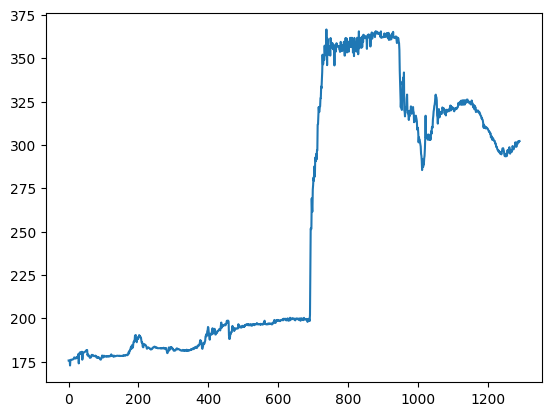

In [ ]:
import matplotlib.pyplot as plt

plt.plot(data.index, data['T_F'])

In [ ]:
dates=data['Date'].to_numpy()
middle_matrix = data[['T-4','T-3','T-2','T-1','T0','SMA_5_H','SMA_5_L','EMA_5_C','RSI']].to_numpy()
X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
Y=data['T_F']

print(dates.shape)
print(X.shape)
print(Y.shape)

(1292,)
(1292, 9, 1)
(1292,)


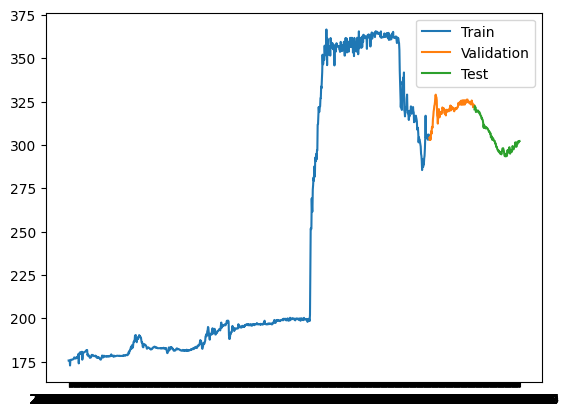

In [ ]:
q_80 = int(len(dates) * .8) #change to 0.8
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], Y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], Y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], Y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from bayes_opt import BayesianOptimization
import numpy as np
import time

def evaluate_network(lstm_units_1,epochs,learning_rate,dense_units_1,dense_units_2):

  lstm_units_1=int(lstm_units_1)
  epochs=int(epochs)
  dense_units_1=int(dense_units_1)
  dense_units_2=int(dense_units_2)

  model = Sequential([layers.Input((9, 1)),
                      layers.LSTM(lstm_units_1),
                      layers.Dense(dense_units_1, activation='relu'),
                      layers.Dense(dense_units_2, activation='relu'),
                      layers.Dense(1)])

  model.compile(loss='mse',
                optimizer=Adam(learning_rate=learning_rate),
                metrics=['mean_absolute_error'])


  # Train the model
  history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, verbose=0)

  # Return the loss (or another metric that you want to minimize)
  val_loss=min(history.history['val_loss'])
  loss=min(history.history['loss'])

  return -(val_loss*loss)  # Negative because BayesianOptimization maximizes, but we want to minimize loss



pbounds = {
    'lstm_units_1': (20, 300),
    'learning_rate': (1e-6, 1e-2),
    'epochs': (10, 300),
    'dense_units_1': (10, 200),
    'dense_units_2': (10, 200)
}

# Initialize Bayesian Optimization
optimizer = BayesianOptimization(
    f=evaluate_network,
    pbounds=pbounds,
    verbose=2,
    random_state=1,
    )

# Run the optimization
start_time = time.time()
optimizer.maximize(init_points=40, n_iter=50)
time_took = (time.time() - start_time)/60


# Get the best hyperparameters
print(f"Total runtime in mins: {time_took}")
best_params = optimizer.max['params']
print(f"Best hyperparameters: {best_params}")



|   iter    |  target   | dense_... | dense_... |  epochs   | learni... | lstm_u... |
-------------------------------------------------------------------------------------
| 1         | -542.7    | 89.23     | 146.9     | 10.03     | 0.003024  | 61.09     |
| 2         | -59.56    | 27.54     | 45.39     | 110.2     | 0.003968  | 170.9     |
| 3         | -1.788e+0 | 89.65     | 140.2     | 69.29     | 0.008781  | 27.67     |
| 4         | -49.11    | 137.4     | 89.29     | 172.0     | 0.001405  | 75.47     |
| 5         | -75.51    | 162.1     | 194.0     | 100.9     | 0.006924  | 265.4     |
| 6         | -103.1    | 180.0     | 26.16     | 21.33     | 0.001699  | 265.9     |
| 7         | -78.2     | 28.69     | 90.01     | 287.8     | 0.005332  | 213.7     |
| 8         | -34.58    | 69.95     | 140.4     | 252.0     | 0.0001839 | 230.0     |
| 9         | -1.45e+07 | 197.9     | 152.2     | 91.33     | 0.007893  | 48.9      |
| 10        | -72.87    | 95.1      | 182.6     | 95.1

Epoch 1/172
33/33 [==============================] - 3s 18ms/step - loss: 61608.6641 - mean_absolute_error: 236.8457 - val_loss: 100459.1797 - val_mean_absolute_error: 316.9119
Epoch 2/172
33/33 [==============================] - 0s 5ms/step - loss: 58490.0156 - mean_absolute_error: 230.1266 - val_loss: 93041.6719 - val_mean_absolute_error: 304.9886
Epoch 3/172
33/33 [==============================] - 0s 6ms/step - loss: 47949.7383 - mean_absolute_error: 205.3851 - val_loss: 69077.9453 - val_mean_absolute_error: 262.7888
Epoch 4/172
33/33 [==============================] - 0s 6ms/step - loss: 25239.5723 - mean_absolute_error: 135.1293 - val_loss: 29857.7266 - val_mean_absolute_error: 172.7303
Epoch 5/172
33/33 [==============================] - 0s 6ms/step - loss: 8469.3730 - mean_absolute_error: 65.0900 - val_loss: 8499.2939 - val_mean_absolute_error: 92.0583
Epoch 6/172
33/33 [==============================] - 0s 6ms/step - loss: 5665.2495 - mean_absolute_error: 68.9298 - val_loss: 6

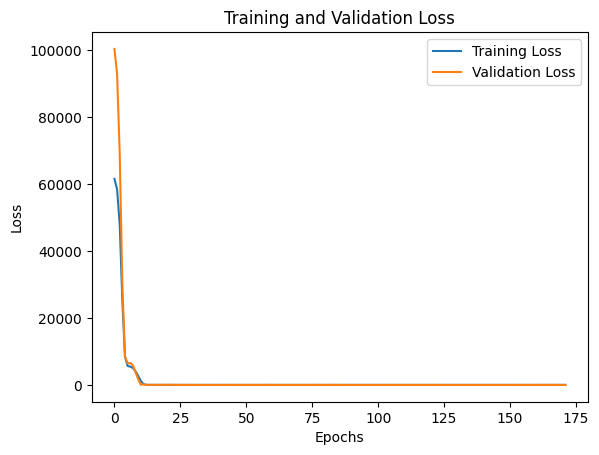

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# model = Sequential([layers.Input((9, 1)),
#                     layers.LSTM(64),
#                     layers.Dense(1)])
model = Sequential([layers.Input((9, 1)),
                   layers.LSTM(244),
                   layers.Dense(121, activation='relu'),
                   layers.Dense(194, activation='relu'),
                   layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.0001874),
              metrics=['mean_absolute_error'])


history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=172)

print(history.history.keys())

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

33/33 [==============================] - 0s 3ms/step


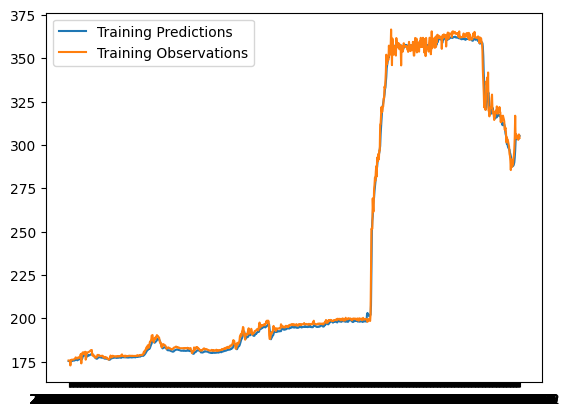

In [ ]:
from sklearn.metrics import mean_squared_error

train_predictions = model.predict(X_train).flatten()
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

190.91657786483506


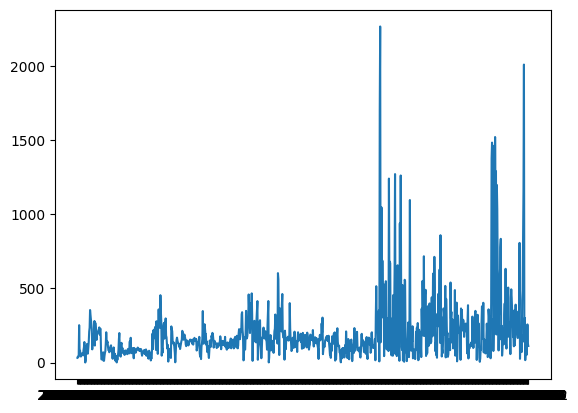

In [ ]:
import numpy as np

basis_point_value=0.01  #For USDLKR pair
train_data_basis_point_diff=((train_predictions/basis_point_value).flatten()-y_train/basis_point_value).abs()
plt.plot(dates_train, train_data_basis_point_diff)

average_train_data_basis_point_diff=np.mean(train_data_basis_point_diff)
print(average_train_data_basis_point_diff)

5/5 [==============================] - 0s 3ms/step


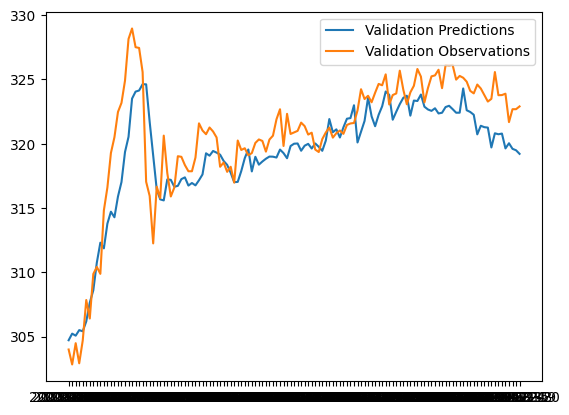

In [ ]:
val_predictions = model.predict(X_val).flatten()
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])


210.2697863856586


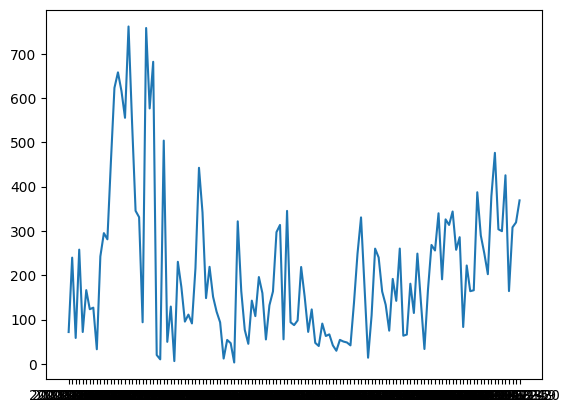

In [ ]:
basis_point_value=0.01  #For USDLKR pair
validation_data_basis_point_diff=((val_predictions/basis_point_value).flatten()-y_val/basis_point_value).abs()
plt.plot(dates_val, validation_data_basis_point_diff)

print(np.mean(validation_data_basis_point_diff))

5/5 [==============================] - 0s 4ms/step


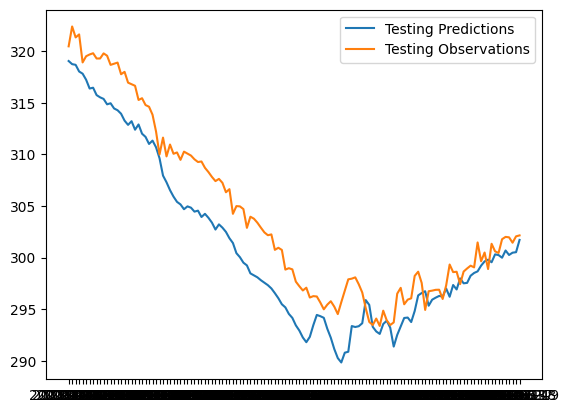

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Assuming test_predictions and y_test are lists or numpy arrays
# Calculate MSE and MAE
mse = mean_squared_error(y_test, test_predictions)
print("Mean Square Error:", mse)
mae=mean_absolute_error(y_test, test_predictions)
print("Mean Absolute Error:", mae)

Mean Square Error: 12.44672992457061
Mean Absolute Error: 3.0866813957481964


308.6675639663457


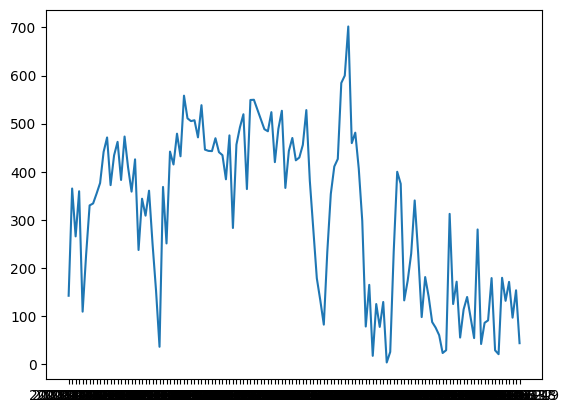

In [ ]:
basis_point_value=0.01  #For USDLKR pair
test_data_basis_point_diff=((test_predictions/basis_point_value).flatten()-y_test/basis_point_value).abs()
plt.plot(dates_test, test_data_basis_point_diff)

print(np.mean(test_data_basis_point_diff))

In [ ]:
#Start Trading with 1000 LKR with model


number_of_trading_days=dates_test.size
test_data=y_test.values
holding_currency="quote"
holding_value=1000
for current_trading_day in range(number_of_trading_days-1):
  if holding_currency=="quote":
    if (test_predictions[current_trading_day+1]>test_data[current_trading_day]):
      holding_value=holding_value/test_data[current_trading_day]
      holding_currency="base"
  else:
    if (test_predictions[current_trading_day+1]<test_data[current_trading_day]):
      holding_value=test_data[current_trading_day]*holding_value
      holding_currency="quote"


if holding_currency=="base":
  holding_value=test_data[current_trading_day]*holding_value

print(number_of_trading_days)
print(holding_value)
print(holding_currency)


130
1023.5729780580209
quote


In [ ]:
#Start Trading with 1000 USD LKR actual values


number_of_trading_days=dates_test.size
test_data=y_test.values
holding_currency="quote"
holding_value=1000
for current_trading_day in range(number_of_trading_days-1):
  if holding_currency=="quote":
    if (test_data[current_trading_day+1]>test_data[current_trading_day]):
      holding_value=holding_value/test_data[current_trading_day]
      holding_currency="base"
  else:
    if (test_data[current_trading_day+1]<test_data[current_trading_day]):
      holding_value=test_data[current_trading_day]*holding_value
      holding_currency="quote"


if holding_currency=="base":
  holding_value=test_data[current_trading_day]*holding_value

print(number_of_trading_days)
print(holding_value)
print(holding_currency)

130
1139.506305144754
base


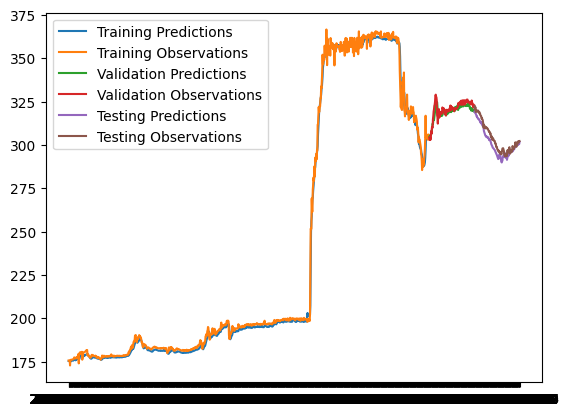

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 16ms/step


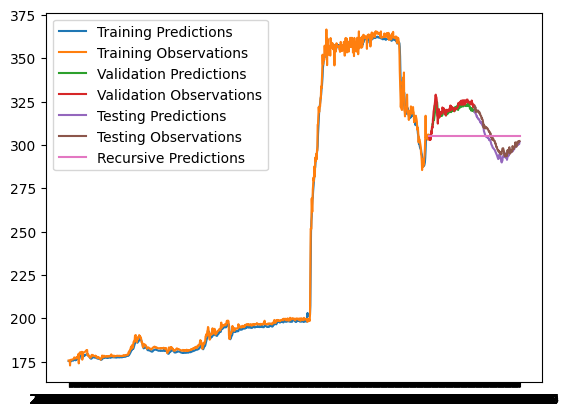

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])